In [2]:
import wave
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
motion_dump = "Motion"
audio_dump = "Audio"

In [47]:
data = None
all_files = os.listdir(audio_dump)
print("There is ", len(all_files), "audio files")
for file in os.listdir(audio_dump)[:1]:
    data = wave.open(audio_dump + "/" + file)

There is  409 audio files


In [39]:
dir(data)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_compname',
 '_comptype',
 '_convert',
 '_data_chunk',
 '_data_seek_needed',
 '_file',
 '_fmt_chunk_read',
 '_framerate',
 '_framesize',
 '_i_opened_the_file',
 '_nchannels',
 '_nframes',
 '_read_fmt_chunk',
 '_sampwidth',
 '_soundpos',
 'close',
 'getcompname',
 'getcomptype',
 'getfp',
 'getframerate',
 'getmark',
 'getmarkers',
 'getnchannels',
 'getnframes',
 'getparams',
 'getsampwidth',
 'initfp',
 'readframes',
 'rewind',
 'setpos',
 'tell']

In [37]:
data.getparams()

_wave_params(nchannels=1, sampwidth=2, framerate=44100, nframes=49996170, comptype='NONE', compname='not compressed')

In [87]:
import struct
import time



def read_data(path):
    data = read_file(path)
    start_time = time.time()
    sampwidth = data.getsampwidth()
    fmts = (None, "=B", "=h", None, "=l")
    fmt = fmts[sampwidth]
    dcs  = (None, 128, 0, None, 0)
    dc = dcs[sampwidth]

    size = 1000000
    array = np.zeros(data.getnframes())

    for i in range(data.getnframes()):
        iframe = data.readframes(1)
        iframe = struct.unpack(fmt, iframe)[0]
        iframe -= dc
        array[i] = iframe

    print(time.time() - start_time)
    return array

(array([4.3400000e+02, 1.3082000e+04, 3.2330100e+05, 4.3000200e+06,
        1.8536118e+07, 2.0528234e+07, 5.7700320e+06, 5.0176800e+05,
        2.2390000e+04, 7.9100000e+02]),
 array([-18852. , -15136.2, -11420.4,  -7704.6,  -3988.8,   -273. ,
          3442.8,   7158.6,  10874.4,  14590.2,  18306. ]),
 <a list of 10 Patch objects>)

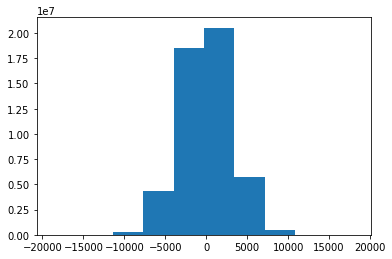

In [45]:
plt.hist(array)

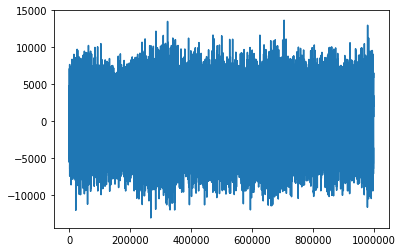

In [46]:
plt.plot(array[:1000000])

In [49]:
all_files

['device1_channel1_20181012124210.wav',
 'device1_channel1_20181012130103.wav',
 'device1_channel1_20181012131957.wav',
 'device1_channel1_20181012133851.wav',
 'device1_channel1_20181012135744.wav',
 'device1_channel1_20181012141638.wav',
 'device1_channel1_20181012143532.wav',
 'device1_channel1_20181012145426.wav',
 'device1_channel1_20181012151319.wav',
 'device1_channel1_20181012153213.wav',
 'device1_channel1_20181012155107.wav',
 'device1_channel1_20181012161000.wav',
 'device1_channel1_20181012162854.wav',
 'device1_channel1_20181012164748.wav',
 'device1_channel1_20181012170641.wav',
 'device1_channel1_20181012172535.wav',
 'device1_channel1_20181012174429.wav',
 'device1_channel1_20181012180322.wav',
 'device1_channel1_20181013110342.wav',
 'device1_channel1_20181013112236.wav',
 'device1_channel1_20181013114130.wav',
 'device1_channel1_20181013120023.wav',
 'device1_channel1_20181013121917.wav',
 'device1_channel1_20181013123811.wav',
 'device1_channel1_20181013125705.wav',


In [77]:
from datetime import datetime

def get_name_from_datetime(datetime1, prefix='device1_channel1_'):
    return audio_dump + '/' + prefix + datetime.strftime(datetime1, '%Y%m%d%H%M%S') + '.wav'

def read_file(path):
    return wave.open(path)

def get_datetime_from_filename(path):
    path = path.split('.')
    sample = '20181013110342'
    return datetime.strptime(path[0][-len(sample) : ], '%Y%m%d%H%M%S')
    
    
get_datetime_from_filename('device1_channel1_20181012180322.wav')

datetime.datetime(2018, 10, 12, 18, 3, 22)

In [122]:
def find_audiofile_by_time(time):
    times = []
    for file in all_files:
        current_time = get_datetime_from_filename(file)
        if current_time < time:
            times.append(current_time)
    return (max(times), get_name_from_datetime(max(times)))

def find_audiofiles_by_time(time1, time2):
    times = []
    for file in all_files:
        current_time = get_datetime_from_filename(file)
        if current_time > time1 and current_time < time2:
            times.append(current_time)
    return (times, [get_name_from_datetime(time) for time in times])

find_audiofile_by_time(start_times[0])        

(datetime.datetime(2018, 10, 21, 18, 5, 37),
 'Audio/device1_channel1_20181021180537.wav')

In [56]:
df = pd.read_excel('IHearVoicesData.xlsx')
df.columns = df.iloc[0]
df = df.iloc[1:]
df

,Date,Time,Date,Time,Process status (data label),Time Start,Time Finish,Total Hours
1,2018-10-12 00:00:00,13:00:00,2018-10-12 00:00:00,16:00:00,Stopped,2018-10-12 13:00:00,2018-10-12 16:00:00,3
2,2018-10-12 00:00:00,16:00:00,2018-10-12 00:00:00,18:00:00,Good,2018-10-12 16:00:00,2018-10-12 18:00:00,2
3,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS
4,2018-10-13 00:00:00,12:15:00,2018-10-13 00:00:00,14:15:00,Good,2018-10-13 12:15:00,2018-10-13 14:15:00,2
5,2018-10-13 00:00:00,14:15:00,2018-10-13 00:00:00,18:15:00,Stopped,2018-10-13 14:15:00,2018-10-13 18:15:00,4
6,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS
7,2018-10-14 00:00:00,03:00:00,2018-10-14 00:00:00,07:00:00,Stopped,2018-10-14 03:00:00,2018-10-14 07:00:00,4
8,2018-10-14 00:00:00,07:00:00,2018-10-14 00:00:00,09:00:00,Good,2018-10-14 07:00:00,2018-10-14 09:00:00,2
9,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS,SAME STATUS
10,2018-10-14 00:00:00,13:45:00,2018-10-14 00:00:00,15:45:00,Good,2018-10-14 13:45:00,2018-10-14 15:45:00,2


In [85]:
start_failure_times = df.loc[df['Process status (data label)'] == 'Failure', ['Time Start']].values
finish_failure_times = df.loc[df['Process status (data label)'] == 'Failure', ['Time Finish']].values
start_good_times = df.loc[df['Process status (data label)'] == 'Good', ['Time Start']].values
finish_good_times = df.loc[df['Process status (data label)'] == 'Good', ['Time Finish']].values
print(len(finish_failure_times), len(finish_good_times))

6 23


In [88]:
temp_data = read_data(find_audiofile_by_time(start_times[0])[1])

272.20826387405396


In [105]:
start_failure_times[1][0]

datetime.datetime(2018, 10, 22, 0, 30)

In [131]:
def find_audiofiles_by_time(time1, time2):
    times = []
    for file in all_files:
        current_time = get_datetime_from_filename(file)
        if current_time > time1 and current_time < time2:
            times.append(current_time)
    return (times, [get_name_from_datetime(time) for time in times])

cols = ['mean', 'median', 'max', 'min', '25', '75', 'power']
cols += [str(k) for k in range(10)]
failure_df = pd.DataFrame(columns = cols)
idx = 0
for i in range(len(finish_failure_times)):
    all_files_given_timerange = find_audiofiles_by_time(start_failure_times[i][0], finish_failure_times[i][0])[1]
    print(start_failure_times[i][0], finish_failure_times[i][0])
    for filename in all_files_given_timerange:
        print("Processing file", filename)
        temp_data = read_data(filename)
        d = dict()
        d['max'] = [max(temp_data)]
        d['min'] = [min(temp_data)]
        d['mean'] = [np.mean(temp_data)]
        d['median'] = [np.median(temp_data)]
        d['25'] = [np.percentile(temp_data, 25)]
        d['75'] = [np.percentile(temp_data, 75)]
        d['power'] = [(np.sum(temp_data**2) // len(temp_data))**0.5]
        fft = np.abs(np.fft.fft(temp_data, n=10))
        for j in range(10):
            d[str(j)] = [fft[j]]
        temp_df = pd.DataFrame(data=d)
        failure_df = failure_df.append(temp_df, ignore_index=True)
        failure_df.to_csv('failure_data.csv')

2018-10-21 18:15:00 2018-10-21 21:30:00
Processing file Audio/device1_channel1_20181021182430.wav
191.16732668876648


C:\Users\komisare\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Processing file Audio/device1_channel1_20181021184324.wav
187.4830675125122
Processing file Audio/device1_channel1_20181021190218.wav
182.90782856941223
Processing file Audio/device1_channel1_20181021192112.wav
166.81426978111267
Processing file Audio/device1_channel1_20181021194005.wav
174.39649963378906
Processing file Audio/device1_channel1_20181021195859.wav
162.82853245735168
Processing file Audio/device1_channel1_20181021201753.wav
149.7890021800995
Processing file Audio/device1_channel1_20181021203646.wav
150.22466492652893
Processing file Audio/device1_channel1_20181021205540.wav
150.78705644607544
Processing file Audio/device1_channel1_20181021211434.wav
149.61062598228455
2018-10-22 00:30:00 2018-10-22 01:00:00
Processing file Audio/device1_channel1_20181022004224.wav
152.10755062103271
2018-10-22 09:30:00 2018-10-22 14:20:00
Processing file Audio/device1_channel1_20181022093127.wav
150.6050853729248
Processing file Audio/device1_channel1_20181022095021.wav
166.58888006210327

In [132]:
cols = ['mean', 'median', 'max', 'min', '25', '75', 'power']
cols += [str(k) for k in range(10)]
good_df = pd.DataFrame(columns = cols)
idx = 0
for i in range(len(finish_good_times)):
    all_files_given_timerange = find_audiofiles_by_time(start_good_times[i][0], finish_good_times[i][0])[1]
    print(start_good_times[i][0], finish_good_times[i][0])
    for filename in all_files_given_timerange:
        print("Processing file", filename)
        temp_data = read_data(filename)
        d = dict()
        d['max'] = [max(temp_data)]
        d['min'] = [min(temp_data)]
        d['mean'] = [np.mean(temp_data)]
        d['median'] = [np.median(temp_data)]
        d['25'] = [np.percentile(temp_data, 25)]
        d['75'] = [np.percentile(temp_data, 75)]
        d['power'] = [(np.sum(temp_data**2) // len(temp_data))**0.5]
        fft = np.abs(np.fft.fft(temp_data, n=10))
        for j in range(10):
            d[str(j)] = [fft[j]]
        temp_df = pd.DataFrame(data=d)
        good_df = good_df.append(temp_df, ignore_index=True)
        good_df.to_csv('good_data.csv')

2018-10-12 16:00:00 2018-10-12 18:00:00
Processing file Audio/device1_channel1_20181012161000.wav
161.49651622772217


C:\Users\komisare\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Processing file Audio/device1_channel1_20181012162854.wav
147.25800681114197
Processing file Audio/device1_channel1_20181012164748.wav
156.05428838729858
Processing file Audio/device1_channel1_20181012170641.wav
152.15662097930908
Processing file Audio/device1_channel1_20181012172535.wav
168.71218013763428
Processing file Audio/device1_channel1_20181012174429.wav


KeyboardInterrupt: 

In [119]:
failure_df.to_csv('failure_df.csv')
failure_df

,0,1,2,25,3,4,5,6,7,75,8,9,max,mean,median,min
0,4074.0,4565.803935,3437.423096,-1745.0,2013.055248,1719.726565,1376.0,1719.726565,2013.055248,1751.0,3437.423096,4565.803935,15970.0,0.228377,5.0,-18639.0
1,15425.0,6424.672653,2260.412989,-2135.0,494.138944,627.553282,289.0,627.553282,494.138944,2121.0,2260.412989,6424.672653,31144.0,0.242135,-17.0,-31023.0
2,13991.0,12823.346029,3846.351731,-1903.0,3130.334427,2527.830168,2319.0,2527.830168,3130.334427,1902.0,3846.351731,12823.346029,32767.0,0.261261,-1.0,-24110.0
3,24393.0,11831.653001,3712.933980,-1923.0,3378.429260,2681.670051,2399.0,2681.670051,3378.429260,1934.0,3712.933980,11831.653001,32767.0,0.262606,11.0,-32768.0
4,22893.0,4093.629514,1324.528659,-1352.0,313.457179,219.662993,223.0,219.662993,313.457179,1367.0,1324.528659,4093.629514,20034.0,0.261479,16.0,-17286.0
5,34427.0,1526.406670,1391.395969,-2152.0,1779.138746,1165.274756,1101.0,1165.274756,1779.138746,2148.0,1391.395969,1526.406670,22617.0,0.253797,-3.0,-23857.0


In [118]:
good_df.to_csv("good_df.csv")
good_df

,0,1,2,25,3,4,5,6,7,75,8,9,max,mean,median,min
0,44927.0,3041.044603,498.186469,-1533.0,850.297432,445.643627,297.0,445.643627,850.297432,1535.0,498.186469,3041.044603,17831.0,0.238532,1.0,-19297.0
1,17166.0,7762.030704,3136.286024,-1693.0,1405.644458,1471.691875,1776.0,1471.691875,1405.644458,1694.0,3136.286024,7762.030704,17350.0,0.259849,-1.0,-17501.0
2,24499.0,8859.892669,2210.643635,-2703.0,463.222293,830.831944,537.0,830.831944,463.222293,2701.0,2210.643635,8859.892669,26836.0,0.266173,0.0,-27147.0
3,8068.0,2017.799633,3527.170238,-2100.0,792.601187,401.942925,146.0,401.942925,792.601187,2097.0,3527.170238,2017.799633,21849.0,0.159821,-4.0,-24194.0
4,24792.0,2890.872210,1612.444718,-1711.0,702.397940,336.637836,250.0,336.637836,702.397940,1716.0,1612.444718,2890.872210,29628.0,0.264534,9.0,-26359.0
5,19075.0,11541.576658,3923.549790,-2019.0,1754.920295,1692.167854,1279.0,1692.167854,1754.920295,2028.0,3923.549790,11541.576658,17661.0,0.160071,8.0,-22219.0
6,10890.0,3997.903917,1573.156153,-2296.0,963.136166,597.975517,444.0,597.975517,963.136166,2292.0,1573.156153,3997.903917,32151.0,0.251100,-7.0,-29746.0
7,1409.0,5266.260199,1329.611498,-1426.0,887.969884,178.298248,91.0,178.298248,887.969884,1424.0,1329.611498,5266.260199,22366.0,0.250511,0.0,-21468.0
8,8565.0,2593.425395,2007.759224,-2262.0,190.813314,147.505590,425.0,147.505590,190.813314,2258.0,2007.759224,2593.425395,28758.0,0.241031,1.0,-32768.0
9,20219.0,7058.935316,3239.453912,-2103.0,966.673264,287.846058,505.0,287.846058,966.673264,2087.0,3239.453912,7058.935316,26581.0,0.249829,-26.0,-27188.0


In [110]:
df = pd.DataFrame(data={'1':[2, 3], '2': [3, 4]})
df = df.append(pd.DataFrame(data={'1':[4, 5], '2': [6, 7]}), ignore_index=True)
df

,1,2
0,2,3
1,3,4
2,4,6
3,5,7


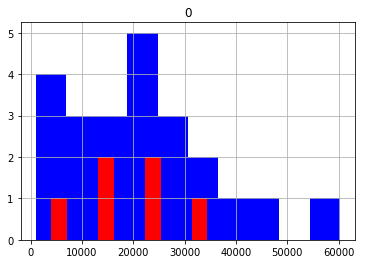

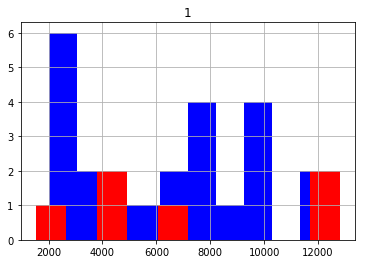

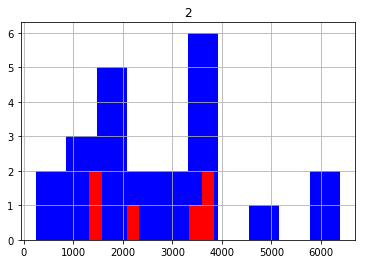

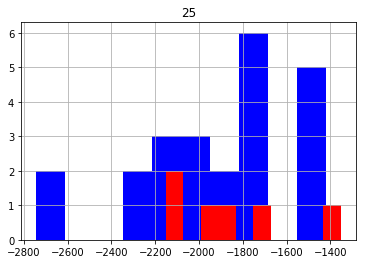

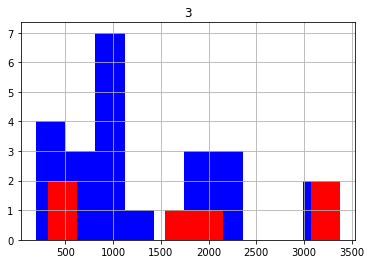

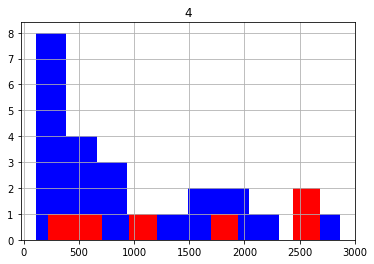

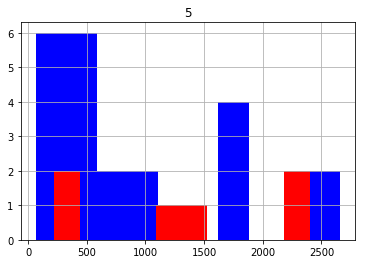

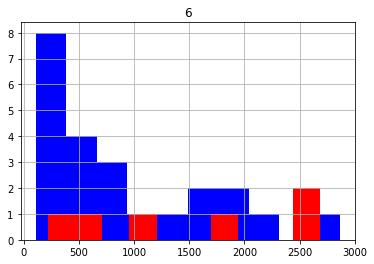

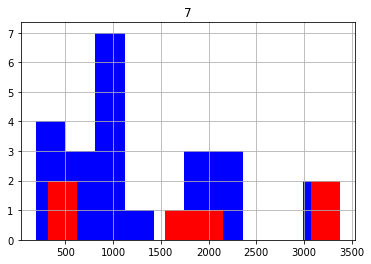

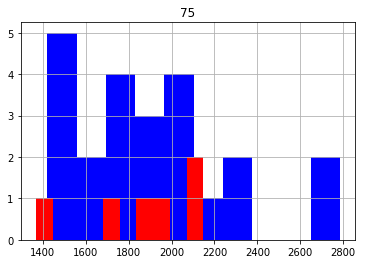

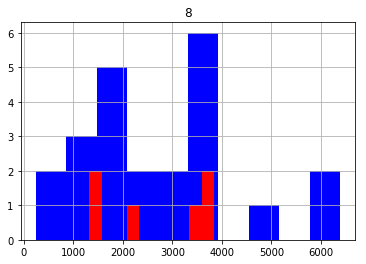

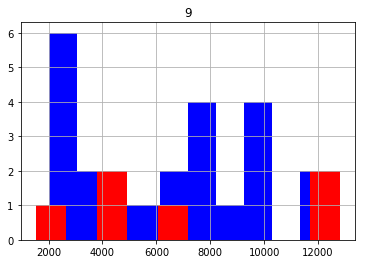

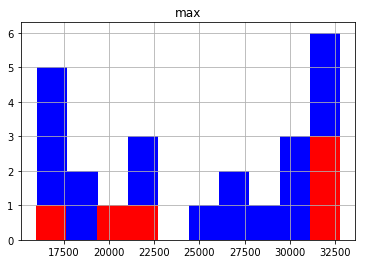

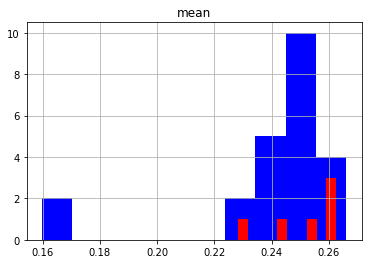

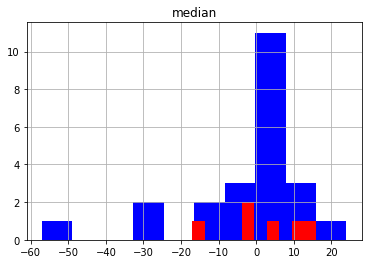

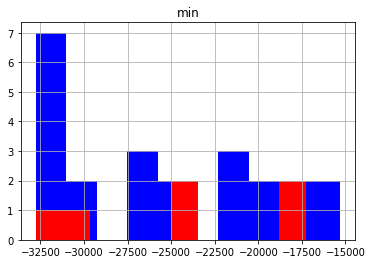

In [121]:
for col in good_df.columns:
    plt.title(col)
    good_df[col].hist(color='blue')
    failure_df[col].hist(color='red')
    plt.show()

In [124]:
print(start_failure_times[0][0], finish_failure_times[0][0])
find_audiofiles_by_time(start_failure_times[0][0], finish_failure_times[0][0])

2018-10-21 18:15:00 2018-10-21 21:30:00


([datetime.datetime(2018, 10, 21, 18, 24, 30),
  datetime.datetime(2018, 10, 21, 18, 43, 24),
  datetime.datetime(2018, 10, 21, 19, 2, 18),
  datetime.datetime(2018, 10, 21, 19, 21, 12),
  datetime.datetime(2018, 10, 21, 19, 40, 5),
  datetime.datetime(2018, 10, 21, 19, 58, 59),
  datetime.datetime(2018, 10, 21, 20, 17, 53),
  datetime.datetime(2018, 10, 21, 20, 36, 46),
  datetime.datetime(2018, 10, 21, 20, 55, 40),
  datetime.datetime(2018, 10, 21, 21, 14, 34)],
 ['Audio/device1_channel1_20181021182430.wav',
  'Audio/device1_channel1_20181021184324.wav',
  'Audio/device1_channel1_20181021190218.wav',
  'Audio/device1_channel1_20181021192112.wav',
  'Audio/device1_channel1_20181021194005.wav',
  'Audio/device1_channel1_20181021195859.wav',
  'Audio/device1_channel1_20181021201753.wav',
  'Audio/device1_channel1_20181021203646.wav',
  'Audio/device1_channel1_20181021205540.wav',
  'Audio/device1_channel1_20181021211434.wav'])